In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
#from statannot.statannot import add_stat_annotation

In [27]:
presence_absence_df = pd.read_csv('D://TFM/LLUIS/Results/07-heatmaps/presence_absence_df.txt', sep = '\t')

In [28]:
presence_absence_df

,Class,miRNA,Simples,Doubles,Triple,sum
0,narrow,cme-miR1515,1,1,1,2
1,broad,cme-miR156b,1,1,1,2
2,broad,cme-miR156e,1,1,0,1
3,intermediate,cme-miR159a,1,1,1,2
4,narrow,"cme-miR160a,b,c",1,1,0,1
...,...,...,...,...,...,...
92,broad,viri2-miR167-2,1,1,1,2
93,intermediate,viri2-miR168-2,1,1,0,1
94,intermediate,viri2-miR168-5,1,1,1,2
95,broad,viri2-miR319-1,1,1,1,2


### creation of the graph with networkx

In [29]:
miRNA_graph = nx.Graph(nombre = 'miRNA_connectivity')

In [30]:
# Add nodes
miRNA_graph.add_nodes_from(list(presence_absence_df.loc[:,'miRNA']))
miRNA_graph.add_nodes_from(['Simple stresses', 'Double stresses', 'Triple stress'])

In [31]:
miRNA_graph.nodes()

NodeView(('cme-miR1515', 'cme-miR156b', 'cme-miR156e', 'cme-miR159a', 'cme-miR160a,b,c', 'cme-miR162', 'cme-miR164a', 'cme-miR164c,d', 'cme-miR166a,b,c,d,f,h', 'cme-miR166e', 'cme-miR167a,b', 'cme-miR167c', 'cme-miR167d,f', 'cme-miR169a,b', 'cme-miR169c,d,o', 'cme-miR169i,j,l,m', 'cme-miR171a,e,g', 'cme-miR171b,d', 'cme-miR171c,f', 'cme-miR172b,c', 'cme-miR393a,b,c', 'cme-miR396a,c,d', 'cme-miR396b', 'cme-miR396e', 'cme-miR397', 'cme-miR398a', 'cme-miR398b', 'cme-miR408', 'cme-miR6478', 'viri-miR1515-2', 'viri-miR156-32', 'viri-miR156-56', 'viri-miR156-59', 'viri-miR156-70', 'viri-miR156-74-3p', 'viri-miR156-9-3p', 'viri-miR157-3-3p', 'viri-miR157-7-3p', 'viri-miR159-3-3p', 'viri-miR159-4-3p', 'viri-miR159-40', 'viri-miR159-6-3p', 'viri-miR162-3', 'viri-miR162-9', 'viri-miR165-2-3p', 'viri-miR166-14-5p', 'viri-miR166-17', 'viri-miR166-37', 'viri-miR166-42-3p', 'viri-miR166-47-3p', 'viri-miR166-50', 'viri-miR166-7-5p', 'viri-miR167-21-5p', 'viri-miR167-24', 'viri-miR167-27-5p', 'viri-mi

In [32]:
# Add edges by filters
simple_edges = presence_absence_df[presence_absence_df.loc[:,'Simples'] == 1].iloc[:,1]
double_edges = presence_absence_df[presence_absence_df.loc[:,'Doubles'] == 1].iloc[:,1]
triple_edges = presence_absence_df[presence_absence_df.loc[:,'Triple'] == 1].iloc[:,1]

In [33]:
for miR in simple_edges:
    miRNA_graph.add_edges_from([(miR, 'Simple stresses')])

for miR in double_edges:
    miRNA_graph.add_edges_from([(miR, 'Double stresses')])

for miR in triple_edges:
    miRNA_graph.add_edges_from([(miR, 'Triple stress')])

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


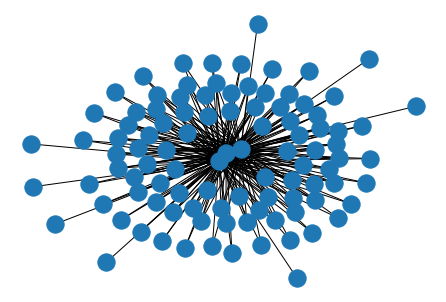

In [34]:
nx.draw(miRNA_graph)

In [35]:
#plt.figure(figsize=(15,15))
nx.write_gml(miRNA_graph, path='D://TFM/LLUIS/Results/09-conectividad_networkx/conectividad_RNAs.gml')
#nx.draw_networkx(miRNA_graph, node_size = 6, node_color = 'b', with_labels = True)

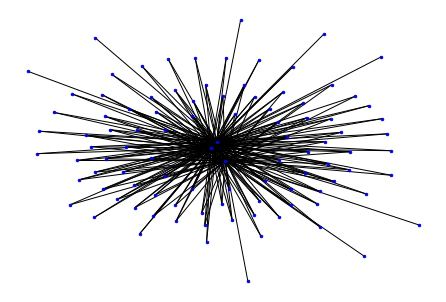

In [36]:
nx.draw_spring(miRNA_graph, node_size = 6, node_color = 'b') 

### Betweeness centrality


In [37]:
keys_bet_cen = list(nx.betweenness_centrality(miRNA_graph).keys())[:-3]
values_bet_cen = list(nx.betweenness_centrality(miRNA_graph).values())[:-3]

In [38]:
def highestbetweenness(G):
    node = max(nx.betweenness_centrality(G), key = nx.betweenness_centrality(G).get)
    value = nx.betweenness_centrality(G)[node]
    return node, value

print("The node with the highest betweenness is ", highestbetweenness(miRNA_graph)[0], 
      "with a value of", highestbetweenness(miRNA_graph)[1])


The node with the highest betweenness is  Double stresses with a value of 0.445791640994397


In [39]:
# Create a data frame and group betweenness by Class:
betweenness_df = presence_absence_df.iloc[:,[0,1]]

In [40]:
betweenness_df['Betweenness centrality'] = values_bet_cen

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
betweenness_df

,Class,miRNA,Betweenness centrality
0,narrow,cme-miR1515,0.000381
1,broad,cme-miR156b,0.000381
2,broad,cme-miR156e,0.000030
3,intermediate,cme-miR159a,0.000381
4,narrow,"cme-miR160a,b,c",0.000030
...,...,...,...
92,broad,viri2-miR167-2,0.000381
93,intermediate,viri2-miR168-2,0.000030
94,intermediate,viri2-miR168-5,0.000381
95,broad,viri2-miR319-1,0.000381


In [42]:
betweenness_df.groupby('Class').sum()
#There are significant differences? Let's see with the non-parametric test Mann-Whitney-U

,Betweenness centrality
Class,
broad,0.014242
intermediate,0.010233
narrow,0.001293


In [43]:
bet_broad = betweenness_df[betweenness_df.loc[:,'Class'] == 'broad'].iloc[:,2]
bet_intermediate = betweenness_df[betweenness_df.loc[:,'Class'] == 'intermediate'].iloc[:,2]
bet_narrow = betweenness_df[betweenness_df.loc[:,'Class'] == 'narrow'].iloc[:,2]

### Mann-Whitney, the non-parametric version of a t-test

In [44]:
print('The pvalue Broad-Intermediate is...', stats.mannwhitneyu(bet_broad,bet_intermediate))
print('The pvalue Broad-Narrow is...', stats.mannwhitneyu(bet_broad,bet_narrow))
print('The pvalue Intermediate-Narrow is...', stats.mannwhitneyu(bet_intermediate,bet_narrow))

The pvalue Broad-Intermediate is... MannwhitneyuResult(statistic=699.0, pvalue=0.0051814760346668085)
The pvalue Broad-Narrow is... MannwhitneyuResult(statistic=100.0, pvalue=0.00035737194720023187)
The pvalue Intermediate-Narrow is... MannwhitneyuResult(statistic=144.5, pvalue=0.04116076739113553)


### Kruskal-Wallis test, the non-parametric version of ANOVA

In [45]:
stats.kruskal(bet_broad, bet_intermediate, bet_narrow)

KruskalResult(statistic=13.06083631613857, pvalue=0.001458395882257947)

### Tests Mann-Whitney with sums directly

In [46]:
pres_broad = presence_absence_df[presence_absence_df.loc[:,'Class'] == 'broad'].iloc[:,5]
pres_intermediate = presence_absence_df[presence_absence_df.loc[:,'Class'] == 'intermediate'].iloc[:,5]
pres_narrow = presence_absence_df[presence_absence_df.loc[:,'Class'] == 'narrow'].iloc[:,5]

In [47]:
print('The pvalue Broad-Intermediate is...', stats.mannwhitneyu(pres_broad,pres_intermediate))
print('The pvalue Broad-Narrow is...', stats.mannwhitneyu(pres_broad,pres_narrow))
print('The pvalue Intermediate-Narrow is...', stats.mannwhitneyu(pres_intermediate,pres_narrow))

The pvalue Broad-Intermediate is... MannwhitneyuResult(statistic=703.0, pvalue=0.005564906296440047)
The pvalue Broad-Narrow is... MannwhitneyuResult(statistic=105.0, pvalue=0.000572549093899498)
The pvalue Intermediate-Narrow is... MannwhitneyuResult(statistic=154.5, pvalue=0.06515968678283662)


## Plotting a bar plot

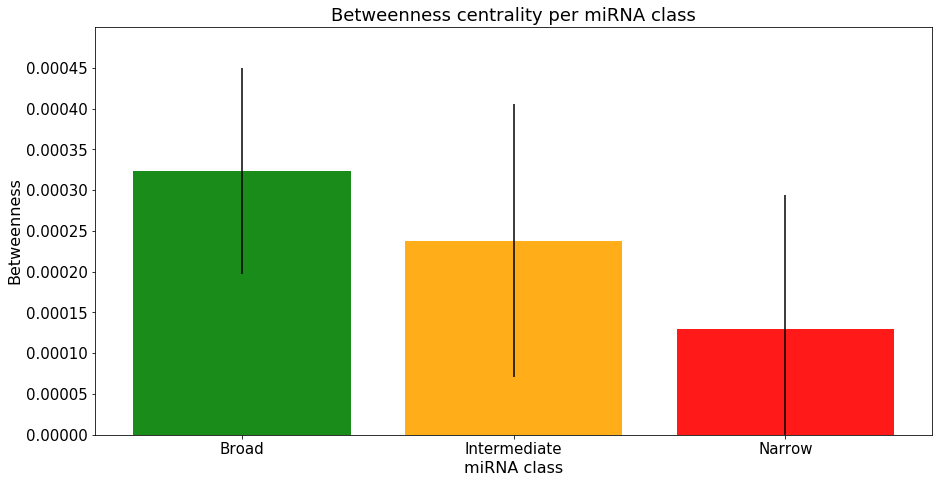

In [100]:
# For centrality 
objects = ('Broad', 'Intermediate', 'Narrow')
y_pos = np.arange(len(objects))
y = [np.mean(bet_broad), np.mean(bet_intermediate), np.mean(bet_narrow)]

plt.figure(figsize=(15,7.5))
plt.bar(y_pos, y, align='center', alpha=0.9,
        color = ['green', 'orange', 'red'], yerr = [np.std(bet_broad), 
                                                   np.std(bet_intermediate),
                                                   np.std(bet_narrow)])
plt.ylim(0,0.0005)
plt.xticks(y_pos, objects, fontsize = 15)
plt.yticks(np.arange(0,0.0005,0.00005), fontsize = 15)
plt.ylabel('Betweenness', fontsize = 16)
plt.xlabel('miRNA class', fontsize = 16)
plt.title('Betweenness centrality per miRNA class', fontsize = 18)

plt.show()

In [56]:
np.mean(pres_broad)

1.7727272727272727

In [103]:
#For betweenness
yerr = [np.std(bet_broad), np.std(bet_intermediate), np.std(bet_narrow)]

In [104]:
yerr

[0.000126092272573645, 0.00016728369114877174, 0.00016505141586172054]